## Libraries

In [280]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

#--- Reduce the non-necessary words
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer #convert text to matrix number
from sklearn import cluster #group keywords

## Define Object Paper

In [298]:
### Object Paper
from multiprocessing.resource_sharer import stop
from symbol import yield_arg
from unicodedata import name


class Paper:
    def __init__(self, name, type, material, keywords, country, year, abstract, prediction_score = None):
        self.name = name  
        self.year = year 
        self.keywords = keywords 
        self.type = type  
        self.material = material 
        self.country = country 
        self.abstract = abstract
        self.prediction_score = None
        


    def get_name(self):
        return self.name
    def get_type(self):
        return self.type
    def get_year(self):
        return self.year 
    def get_keywords(self):
        return self.keywords 
    def get_material(self):
        return self.type
    def get_country(self):
        return self.country
    def get_abstract(self):
        return self.abstract

    def set_keywords(self, keywords):
        self.keywords = keywords
    def set_prediction_score(self, score):
        self.prediction_score = score

class Cluster_group():
    def __init__(self, list_paper, ntop =6, name = None):
        self.list_paper = list_paper
        self.name = name 
        self.list_keywords = []
        self.ntop = ntop
        
    def get_list_paper(self):
        return self.list_paper
    def get_list_keywords(self):
        return self.list_keywords
    def get_npapers(self):
        return len(self.list_paper)
        

    def get_tops_keyword(self):
        
        def tokenizer(keyword):
            stemmer = PorterStemmer()
            #normalize words of string into a list and into its natural roof
            return [stemmer.stem(w) for w in keyword.split(' ')]

        for paper in self.list_paper:
            self.list_keywords += (tokenizer(paper.get_keywords()))

        #--- Stopword analysis
        stop_words = stopwords.words('english')
        stop_words.append("digital")
        stop_words.append("twin")
        stop_words.append("digit")
        
        print("len(list_keywords = ", len(self.list_keywords))
        print("stop words = ", len(stop_words))
        clean_list_keywords = []

        for i in range(len(self.list_keywords)):
            print("i= ", i)
            for j in range(len(stop_words)):
                print("j= ", j)

                if self.list_keywords[i] != stop_words[j]:
                    clean_list_keywords.append(self.list_keywords[i])
        
        self.list_keywords = clean_list_keywords
                    
        
        df = pd.value_counts(np.array(self.list_keywords))

        if len(df) < self.ntop:
            for i in range(len(df)):
                print("Index: ", df.index[i], "| Frequency: ", df.values[i])
        else:
            for i in range(self.ntop):
                print("Index: ", df.index[i], "| Frequency: ", df.values[i])


In [170]:
for i in range(3):
    print(i)

0
1
2


In [130]:
pap1 = Paper("pedro", "type", "material", "key", "brazil", 2001, "abstract")
print(pap1.get_name())

pedro


## Import CSV and create objects

In [283]:
papers_list = []

# Trying with CSV from Python and not Pandas
with open("State of Art .csv", encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',') #object in the memory
    row_counter = 0

    #iterate for each row of the CSV file
    for row in csv_reader:
        if row_counter != 0:
            new_paper = Paper(row[0], row[1], row[2], row[4], row[5], row[6], row[7])
            papers_list.append(new_paper)

        row_counter += 1


In [166]:
l = ['1','2']
l1 = ['3','4']
l2 = l + l1
print(l2)

['1', '2', '3', '4']


### Quick tests with the object list

In [132]:
print(papers_list[0].get_name())
print(papers_list[100].get_keywords())

Digital twin design for real-time monitoring - a case study of die cutting machine
Artificial intelligence tools, Arts computing, Autoencoder, Data driven technique, Data handling, Deep Learning, Digital twin, IIoT, Industrial internet of things (IIoT), Input output programs, Life cycle, Long short-term memory, Long-short Term Memory, Maintainability, Multilayer neural networks, Multilayered neural networks, Probabilistic simulation, Prognostics, RUL Estimation, Recurrent neural network (RNN), Remaining useful lives, Sensor data collections, Simultaneous monitoring, Time series


## Cleaning the Data

In [180]:
#-- Loop for each paper
for paper in papers_list:
    #-- Loop for each string in keyword
    keyword_list = list(paper.get_keywords())
    for i in range(len(keyword_list)):
        if keyword_list[i] == ',':
            keyword_list[i] = ''
    
    paper.set_keywords(''.join(keyword_list))
    

In [184]:
c1 = Cluster_group([papers_list[15], papers_list[16]])
print(c1.get_tops_keyword())
print(c1.get_list_keywords())

Index:  digit | Frequency:  2
Index:  twin | Frequency:  2
Index:  manufactur | Frequency:  1
None
['digit', 'twin', 'manufactur', 'predict', '&', 'forecast', 'digit', 'twin']


## Setup of Stemmer

In [276]:
stemmer = PorterStemmer()
stop_words = stopwords.words('english')
stop_words.append("digital")
stop_words.append("twin")
stop_words.append("digit")


In [277]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Define Tokenizer

In [278]:
def tokenizer(keyword):
    #normalize words of string into a list and into its natural roof
    return [stemmer.stem(w) for w in keyword.split(' ')]

In [262]:
print(type(papers_list[100].get_abstract()))

<class 'str'>


In [138]:
print(tokenizer(papers_list[100].get_abstract()))

['a', 'real', 'world', 'industri', 'iot', 'set', 'up', 'ha', 'pave', 'way', 'for', 'simultan', 'monitor', 'of', 'sever', 'sensor', 'at', 'their', 'uniqu', 'sampl', 'rates.', 'thi', 'ha', 'realiz', 'the', 'need', 'for', 'artifici', 'intellig', 'tool', 'for', 'robust', 'data', 'processing.', 'however,', 'the', 'larg', 'size', 'of', 'input', 'data', 'requir', 'real', 'time', 'monitor', 'and', 'synchron', 'for', 'onlin', 'analysis.', 'as', 'the', 'star', 'concept', 'behind', 'the', 'industri', '4.0', 'wave,', 'a', 'digit', 'twin', 'is', 'a', 'virtual,', 'multi-scal', 'and', 'probabilist', 'simul', 'to', 'mirror', 'the', 'perform', 'of', 'it', 'physic', 'counterpart', 'and', 'serv', 'the', 'product', 'lifecycl', 'in', 'a', 'virtual', 'space.', 'evidently,', 'a', 'digit', 'twin', 'can', 'proactiv', 'identifi', 'potenti', 'issu', 'with', 'it', 'correspond', 'real', 'twin.', 'thus,', 'it', 'is', 'best', 'suit', 'for', 'enabl', 'a', 'physics-bas', 'and', 'data-driven', 'model', 'fusion', 'to', 

## Vectorizer

In [279]:
#Get all the keywords in put it into a new list
papers_keywords_list = []
for i in range(len(papers_list)):
    papers_keywords_list.append(papers_list[i].get_keywords())
print(papers_keywords_list[100])

Artificial intelligence tools Arts computing Autoencoder Data driven technique Data handling Deep Learning Digital twin IIoT Industrial internet of things (IIoT) Input output programs Life cycle Long short-term memory Long-short Term Memory Maintainability Multilayer neural networks Multilayered neural networks Probabilistic simulation Prognostics RUL Estimation Recurrent neural network (RNN) Remaining useful lives Sensor data collections Simultaneous monitoring Time series


In [264]:
#Create the object vectorizer
tfidf = TfidfVectorizer(use_idf=False, norm=None)

In [265]:
#Count the number of times that a keywords appears in one article-keyword
data_vectorized = tfidf.fit_transform(papers_keywords_list).toarray()


In [266]:
#Transform the array into a dataframe to export as CSV file
data_frame = pd.DataFrame(data_vectorized, index=papers_keywords_list, columns =tfidf.get_feature_names() )
data_frame.to_csv("data_vectorized.csv")


c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [243]:
print(data_frame)

                                                    1451   19  23247   3d  \
Digital twin monitoring                              0.0  0.0    0.0  0.0   
Digital twin Healthcare monitoring                   0.0  0.0    0.0  0.0   
Digital twin Hybrid Analysis and Modeling Machi...   0.0  0.0    0.0  0.0   
Digital twin MTconnect cyberphysical cloud manu...   0.0  0.0    0.0  0.0   
Digital twin data-model fusion reduced-order model   0.0  0.0    0.0  0.0   
...                                                  ...  ...    ...  ...   
Big data Data handling Data mining Data mining ...   0.0  0.0    0.0  0.0   
Active automata learning Active automaton learn...   0.0  0.0    0.0  0.0   
Application examples Batch data processing Batc...   0.0  0.0    0.0  0.0   
3D modeling Classification (of information) Cla...   0.0  0.0    0.0  1.0   
Agent based modeling Agent-based model Artifici...   0.0  0.0    0.0  0.0   

                                                     4g   5g  abilities  \


In [267]:
tfidf_simpler = TfidfVectorizer(tokenizer=tokenizer, stop_words=stop_words)
data_vectorized_simpler = tfidf_simpler.fit_transform(papers_keywords_list).toarray()
X_data_frame = pd.DataFrame(data_vectorized_simpler, index=papers_keywords_list, columns=tfidf_simpler.get_feature_names())


c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'digit', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn(
c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [245]:
print(data_vectorized_simpler)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [247]:
print(tfidf_simpler.get_feature_names())

['', '%', '&', "'current", '(ai)', '(bpr)', '(coap)', '(comput', '(cpcm)', '(cps)', '(cpss)', '(dmu)', '(dss)', '(dt)', '(dtme)', '(dts)', '(eecm)', '(electronic)', '(friction)', '(iiot)', '(iot)', '(languages)', '(mas)', '(mbse)', '(mda)', '(of', '(osp)', '(phil)', '(plc)', '(plm)', '(rami', '(rfid)', '(rms)', '(rnn)', '(sdn)', '(sfdts)', '(soa)', '(uhf', '1451', '23247', '3d', '3d-print', '4.0', '4.0)', '4g', '5g', 'abil', 'absorpt', 'academ', 'acceler', 'accid', 'accur', 'acquisit', 'action', 'action-ori', 'activ', 'adapt', 'addit', 'adhes', 'administr', 'adopt', 'adult', 'advanc', 'advantag', 'aec', 'aeroengin', 'aerospac', 'after-sal', 'age', 'agent', 'agent-bas', 'agil', 'agricultur', 'agv', 'aid', 'air', 'aircraft', 'alarm', 'alert', 'algebra', 'algorithm', 'alloc', 'amount', 'analysi', 'analyt', 'annual', 'anomali', 'applianc', 'applic', 'application-driven', 'application-ori', 'approach', 'arc', 'architect', 'architectur', 'area', 'arriv', 'art', 'arti', 'artichitectur', 'arti

c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [248]:
print(X_data_frame)

                                                           %    &  'current  \
Digital twin monitoring                             0.0  0.0  0.0       0.0   
Digital twin Healthcare monitoring                  0.0  0.0  0.0       0.0   
Digital twin Hybrid Analysis and Modeling Machi...  0.0  0.0  0.0       0.0   
Digital twin MTconnect cyberphysical cloud manu...  0.0  0.0  0.0       0.0   
Digital twin data-model fusion reduced-order model  0.0  0.0  0.0       0.0   
...                                                 ...  ...  ...       ...   
Big data Data handling Data mining Data mining ...  0.0  0.0  0.0       0.0   
Active automata learning Active automaton learn...  0.0  0.0  0.0       0.0   
Application examples Batch data processing Batc...  0.0  0.0  0.0       0.0   
3D modeling Classification (of information) Cla...  0.0  0.0  0.0       0.0   
Agent based modeling Agent-based model Artifici...  0.0  0.0  0.0       0.0   

                                                   

## Clustering 

In [268]:
clustering = cluster.AffinityPropagation()

In [269]:
clustering_prediction = clustering.fit_predict(X_data_frame)
print(clustering_prediction)

[ 0  0  6 32 19  1  1  3  5 40  2  2 10  3  5 10  4  6  4  5  4 10 10  6
  2 11 10 11  4 11  4  4  4  4 18 37  4 25  6  0  4 11 45  7 10  8  4 11
  8  9 11 44  0 10  0 60 11 12 11  5 11 12 18 10 18 13 13 42  8 10 18 18
 21 37  9 32  5 14  6 63 59 38  6 40 60 42  4 34 32  6 15 16 66 41 21 16
 36 17 16 40 21 32  6 45  7  5  5 20 18 19 19 28 20  6 18 26 28  5 16 44
  5 44 46 26  9 16  6 42 28 28  5 63 16 11  7 11 36 19  7 25 49 11 30  5
 45 63 11 11 36  9 46 20 16 44 16 43 63 19 38 50 36  4 16 21  0 21 24 22
 23 43 20  5 55 45 11 63 19 63 63 33 26 66  9  7 19 38 63 42 24 25 11 36
 36 19  6 39 26 27 17  7 36 32 20 52 36 36 38 27 43 50  4 20  7  7 14 43
 28 15 11 43 29 44 29 29 30 30  1 18 45 38 41  7 53 26 39 33 43 33 38 31
 28 30 36 42 31 20 40 20 24  7 31 39 31 14 45 41 32 14  5 26 22 32 44 25
 26 23 53 36 63 38 48 29 26 35 33 24 34 12 45 27 35 24 45 36 14 35 33 37
 46 30 35 17 36 38 42 39 26 36  9 51 14 45 33 42 40 26 40 53 41 17 26  7
 45 39  6 43 45 45 53 53 53 43 52  6 42 43 24  7 44

In [270]:
X_data_frame['prediction'] = clustering.fit_predict(X_data_frame)
X_data_frame.to_csv("data_vectorized_simpler.csv")

c:\Users\pedro\.virtualenvs\virtenv-sPQTmXGI\lib\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [271]:
print("Number of clusters = ", clustering_prediction.max())

Number of clusters =  67


### Cluster Objects

In [272]:
l = 10*[]
print(l)

[]


In [273]:
#-- Give the score for each paper object
for i in range(len(clustering_prediction)):
    for paper in papers_list:
        paper.set_prediction_score(clustering_prediction[i])


#### Creating cluster objects

In [299]:
#-- Creating cluster objects
cluster_list = []
for nclusters in range(len(clustering_prediction)):
    similar_papers_list = []
    for i in range(len(clustering_prediction)):
        if clustering_prediction[i] == nclusters:
            similar_papers_list.append(papers_list[i])
    cluster_list.append(Cluster_group(similar_papers_list))

In [256]:
for i in range(len(clustering_prediction)):
    if clustering_prediction[i] == 7:
        #print(papers_list[i].get_keywords())
        pass

In [300]:
X_serial_number = []
Y_number_papers = []
for nclusters in range(len(cluster_list)):
    if cluster_list[nclusters].get_npapers() != 0:
        X_serial_number.append(nclusters)
        Y_number_papers.append(cluster_list[nclusters].get_npapers())

        print("============================")
        print("Serial Number = ", nclusters)
        print("--- Number of papers = ", cluster_list[nclusters].get_npapers())
        print()
        cluster_list[nclusters].get_tops_keyword()
        print("============================")
        print()

Serial Number =  0
--- Number of papers =  6

len(list_keywords =  72
stop words =  182
i=  0
j=  0
j=  1
j=  2
j=  3
j=  4
j=  5
j=  6
j=  7
j=  8
j=  9
j=  10
j=  11
j=  12
j=  13
j=  14
j=  15
j=  16
j=  17
j=  18
j=  19
j=  20
j=  21
j=  22
j=  23
j=  24
j=  25
j=  26
j=  27
j=  28
j=  29
j=  30
j=  31
j=  32
j=  33
j=  34
j=  35
j=  36
j=  37
j=  38
j=  39
j=  40
j=  41
j=  42
j=  43
j=  44
j=  45
j=  46
j=  47
j=  48
j=  49
j=  50
j=  51
j=  52
j=  53
j=  54
j=  55
j=  56
j=  57
j=  58
j=  59
j=  60
j=  61
j=  62
j=  63
j=  64
j=  65
j=  66
j=  67
j=  68
j=  69
j=  70
j=  71
j=  72
j=  73
j=  74
j=  75
j=  76
j=  77
j=  78
j=  79
j=  80
j=  81
j=  82
j=  83
j=  84
j=  85
j=  86
j=  87
j=  88
j=  89
j=  90
j=  91
j=  92
j=  93
j=  94
j=  95
j=  96
j=  97
j=  98
j=  99
j=  100
j=  101
j=  102
j=  103
j=  104
j=  105
j=  106
j=  107
j=  108
j=  109
j=  110
j=  111
j=  112
j=  113
j=  114
j=  115
j=  116
j=  117
j=  118
j=  119
j=  120
j=  121
j=  122
j=  123
j=  124
j=  125
j=  126


IndexError: pop index out of range

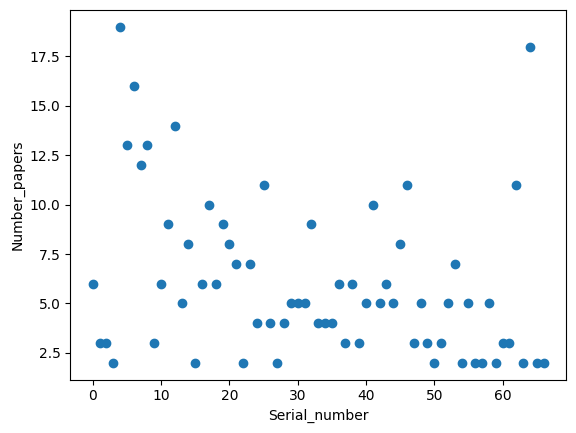

In [234]:
plt.scatter(X_serial_number, Y_number_papers)
plt.xlabel("Serial_number")
plt.ylabel("Number_papers")
plt.show()

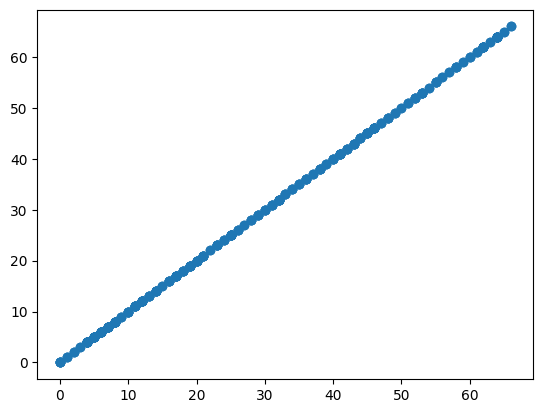

## Selecting Papers

In [ ]:
required_keywords = ["monitoring"]